# 1

In [88]:
import re

import pandas
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
url = "https://raw.githubusercontent.com/gabrielsvinha/text_processing/master/input.csv"
news_list = pandas.read_csv(url).replace(np.nan, '', regex=True)
documents_cc = news_list.text.count()


tokenizer = RegexpTokenizer(r'\w+')
sw = stopwords.words("portuguese")
words, bigrams = [], []

for entry in news_list.text:
    tokens = []
    for token in tokenizer.tokenize(entry.lower()):
        if token not in sw and len(token) > 3 and not bool(re.search(r'\d', token)):
             tokens.append(token)
    words.extend(tokens)
    bigrams.extend(list(nltk.bigrams(tokens)))
  
total_occurencies = len(words)
voc = len(set(words))

df = pandas.DataFrame(words, columns=['w'])
word_cc = df.w.value_counts().reset_index()
word_cc.columns = ["w", "frequency"]
word_cc['r'] = word_cc.frequency.rank(ascending=False, method='first')

thousand_gt = len(word_cc[word_cc.frequency > 1000])
once_entry = len(word_cc[word_cc.frequency == 1])

indexes = [  
             'Total documents', 
             'Total word occurences',
             'Vocabulary size',
             'Words occuring > 1000 times',
             'Words occuring once'
          ]
values = [
           documents_cc,
           total_occurencies,
           voc,
           thousand_gt,
           once_entry
         ]

res = pandas.DataFrame(data={"index": indexes, "results": values})
res

[nltk_data] Downloading package punkt to
[nltk_data]     /home/securecloud/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/securecloud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/securecloud/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,index,results
0,Total documents,249
1,Total word occurences,111362
2,Vocabulary size,21802
3,Words occuring > 1000 times,0
4,Words occuring once,10794


# 2

In [84]:
word_cc["PR"] = round((word_cc.frequency / total_occurencies) * 100, 2)
word_cc["r.PR"] = round(word_cc.r * word_cc["PR"]  / 100, 3)
word_cc[:50]

,w,frequency,r,PR,r.PR
0,anos,585,1.0,0.53,0.005
1,sobre,426,2.0,0.38,0.008
2,presidente,416,3.0,0.37,0.011
3,bolsonaro,376,4.0,0.34,0.014
4,governo,352,5.0,0.32,0.016
5,país,339,6.0,0.30,0.018
6,ainda,337,7.0,0.30,0.021
7,brasil,333,8.0,0.30,0.024
8,contra,244,9.0,0.22,0.020
9,porque,242,10.0,0.22,0.022


# 3

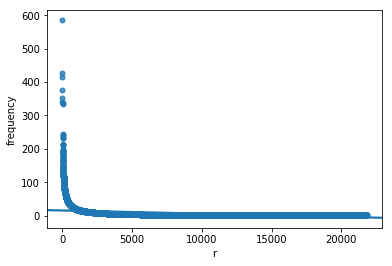

In [91]:
function, axis = plt.subplots()
sns.regplot("r", "frequency", word_cc, ax=axis, marker=".", scatter_kws={"s": 100})

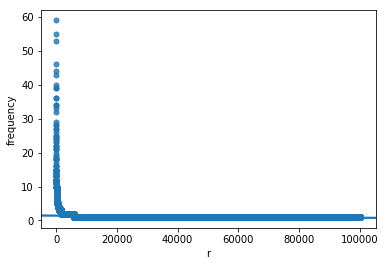

In [92]:
bigram_set = [bigram[0] + ' ' + bigram[1] for bigram in bigrams]
bigram_df = pd.DataFrame(bigram_set, columns=['bigram'])
bigram_cc = bigram_df.bigram.value_counts().reset_index()
bigram_cc.columns = ['b', 'frequency']
bigram_cc["r"] = bigram_cc.frequency.rank(ascending=False, method='first')

function, axis = plt.subplots()
sns.regplot("r", "frequency", bigram_cc, ax=axis, marker=".", scatter_kws={"s": 100})

# 4

In [86]:
n = range(1, 11)
p = [round(1 / (o * (o + 1)), 3) for o in n]
a = [round(len(word_cc[word_cc.frequency == i]) / voc, 3) for i in n]
an = [int(len(word_cc[word_cc.frequency == i])) for i in n]

indexes = [
    "Number of Occurrences (n)", 
    "Predicted Proportion (1/n(n+1))",
    "Actual Proportion", 
    "Actual Number of Words"
]
values = [
    n,
    p,
    a,
    an
]
occ = pandas.DataFrame(data=np.transpose(values), columns=indexes)
occ

,Number of Occurrences (n),Predicted Proportion (1/n(n+1)),Actual Proportion,Actual Number of Words
0,1.0,0.500,0.495,10794.0
1,2.0,0.167,0.166,3627.0
2,3.0,0.083,0.081,1762.0
3,4.0,0.050,0.051,1107.0
4,5.0,0.033,0.035,771.0
5,6.0,0.024,0.023,511.0
6,7.0,0.018,0.018,392.0
7,8.0,0.014,0.015,325.0
8,9.0,0.011,0.012,270.0
9,10.0,0.009,0.011,244.0
